<a href="https://colab.research.google.com/github/jayaismiku/roboadvisor/blob/main/pdp_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [81]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/jayaismiku/roboadvisor/main/dataset/Data_PDP2021_Dataset6.csv \
  -O /tmp/dataset.csv

--2021-10-28 05:05:53--  https://raw.githubusercontent.com/jayaismiku/roboadvisor/main/dataset/Data_PDP2021_Dataset6.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76137 (74K) [text/plain]
Saving to: ‘/tmp/dataset.csv’

/tmp/dataset.csv    100%[===================>]  74.35K  --.-KB/s    in 0.009s  

2021-10-28 05:05:54 (7.73 MB/s) - ‘/tmp/dataset.csv’ saved [76137/76137]



In [105]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/jayaismiku/roboadvisor/main/dataset/Data_PDP2021_Datatest1.csv \
  -O /tmp/datatest.csv

--2021-10-28 05:37:10--  https://raw.githubusercontent.com/jayaismiku/roboadvisor/main/dataset/Data_PDP2021_Datatest1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1519 (1.5K) [text/plain]
Saving to: ‘/tmp/datatest.csv’

/tmp/datatest.csv   100%[===================>]   1.48K  --.-KB/s    in 0s      

2021-10-28 05:37:10 (18.4 MB/s) - ‘/tmp/datatest.csv’ saved [1519/1519]



In [106]:
dataframe = pd.read_csv('/tmp/dataset.csv')
dataframe.head()

,NamaPembeli,KelaminInt,Kelamin,MenikahInt,Menikah,TanggunganInt,Tanggungan,PendidikanInt,Pendidikan,PekerjaanInt,Pekerjaan,PendapatanUtamaInt,PendapatanUtama,PemasukanTambahanInt,PemasukanTambahan,JenisPropertiInt,JenisProperti,NUPInt,NUP,BookingFeeInt,BookingFee,BiayaRumahTanah,UangMuka,PeriodeCicilan,RiwayatPinjamanInt,RiwayatPinjaman,PersetujuanPembelianInt,PersetujuanPembelian
0,Pembeli 001,1,L,0,Tidak,0,0,4,Sarjana,3,POLRI-TNI,2,1jt s.d. <5jt,1,< 1jt,1,Rumah,1,Ya,1,Ya,227000000,62000000,18,1,1,1,Ya
1,Pembeli 002,1,L,1,Ya,4,3+,1,SD,5,Buruh Lepas,1,< 1jt,0,0,2,Tanah,1,Ya,1,Ya,125000000,26000000,18,0,0,1,Ya
2,Pembeli 003,1,L,1,Ya,2,2,3,SMA,4,Pegawai Swasta,2,1jt s.d. <5jt,2,1jt s.d. <5jt,1,Rumah,1,Ya,1,Ya,242000000,92000000,18,3,2+,0,Tidak
3,Pembeli 004,1,L,1,Ya,1,1,4,Sarjana,2,PNS,3,5jt s.d. <10jt,2,1jt s.d. <5jt,1,Rumah,0,Tidak,1,Ya,192000000,62000000,18,0,0,1,Ya
4,Pembeli 005,1,L,0,Tidak,0,0,2,SMP,5,Buruh Lepas,1,< 1jt,0,0,1,Rumah,1,Ya,1,Ya,250000000,74000000,18,0,0,1,Ya


In [83]:
#drop kolom yang tidak perlu
dataframe.drop('NamaPembeli', axis=1, inplace=True)
dataframe.head()

,KelaminInt,Kelamin,MenikahInt,Menikah,TanggunganInt,Tanggungan,PendidikanInt,Pendidikan,PekerjaanInt,Pekerjaan,PendapatanUtamaInt,PendapatanUtama,PemasukanTambahanInt,PemasukanTambahan,JenisPropertiInt,JenisProperti,NUPInt,NUP,BookingFeeInt,BookingFee,BiayaRumahTanah,UangMuka,PeriodeCicilan,RiwayatPinjamanInt,RiwayatPinjaman,PersetujuanPembelianInt,PersetujuanPembelian
0,1,L,0,Tidak,0,0,4,Sarjana,3,POLRI-TNI,2,1jt s.d. <5jt,1,< 1jt,1,Rumah,1,Ya,1,Ya,227000000,62000000,18,1,1,1,Ya
1,1,L,1,Ya,4,3+,1,SD,5,Buruh Lepas,1,< 1jt,0,0,2,Tanah,1,Ya,1,Ya,125000000,26000000,18,0,0,1,Ya
2,1,L,1,Ya,2,2,3,SMA,4,Pegawai Swasta,2,1jt s.d. <5jt,2,1jt s.d. <5jt,1,Rumah,1,Ya,1,Ya,242000000,92000000,18,3,2+,0,Tidak
3,1,L,1,Ya,1,1,4,Sarjana,2,PNS,3,5jt s.d. <10jt,2,1jt s.d. <5jt,1,Rumah,0,Tidak,1,Ya,192000000,62000000,18,0,0,1,Ya
4,1,L,0,Tidak,0,0,2,SMP,5,Buruh Lepas,1,< 1jt,0,0,1,Rumah,1,Ya,1,Ya,250000000,74000000,18,0,0,1,Ya


In [107]:
datatest = pd.read_csv('/tmp/datatest.csv')
datatest.head()

,NamaPembeli,KelaminInt,Kelamin,MenikahInt,Menikah,TanggunganInt,Tanggungan,PendidikanInt,Pendidikan,PekerjaanInt,Pekerjaan,PendapatanUtamaInt,PendapatanUtama,PemasukanTambahanInt,PemasukanTambahan,JenisPropertiInt,JenisProperti,NUPInt,NUP,BookingFeeInt,BookingFee,BiayaRumahTanah,UangMuka,PeriodeCicilan,RiwayatPinjamanInt,RiwayatPinjaman
0,Pembeli 001,1,L,0,Tidak,0,0,5,Pasca Sarjana,3,POLRI-TNI,3,5jt s.d. <10jt,1,< 1jt,1,Rumah,1,Ya,1,Ya,227000000,62000000,18,1,1
1,Pembeli 002,1,L,1,Ya,2,2,4,Sarjana,2,PNS,2,1jt s.d. <5jt,1,< 1jt,2,Tanah,1,Ya,1,Ya,125000000,26000000,18,1,0
2,Pembeli 003,0,P,1,Ya,2,2,3,SMA,1,Wiraswasta,3,5jt s.d. <10jt,2,1jt s.d. <5jt,1,Rumah,1,Ya,1,Ya,242000000,92000000,18,1,2+
3,Pembeli 004,1,L,1,Ya,1,1,2,SMP,5,Buruh Lepas,1,< 1jt,0,0,1,Rumah,1,Ya,1,Ya,192000000,62000000,24,0,0
4,Pembeli 005,1,L,0,Tidak,0,0,1,SD,5,Buruh Lepas,1,< 1jt,0,0,1,Tanah,1,Ya,1,Ya,150000000,74000000,24,0,0


In [108]:
datatest.drop('NamaPembeli', axis=1, inplace=True)
datatest.head()

,KelaminInt,Kelamin,MenikahInt,Menikah,TanggunganInt,Tanggungan,PendidikanInt,Pendidikan,PekerjaanInt,Pekerjaan,PendapatanUtamaInt,PendapatanUtama,PemasukanTambahanInt,PemasukanTambahan,JenisPropertiInt,JenisProperti,NUPInt,NUP,BookingFeeInt,BookingFee,BiayaRumahTanah,UangMuka,PeriodeCicilan,RiwayatPinjamanInt,RiwayatPinjaman
0,1,L,0,Tidak,0,0,5,Pasca Sarjana,3,POLRI-TNI,3,5jt s.d. <10jt,1,< 1jt,1,Rumah,1,Ya,1,Ya,227000000,62000000,18,1,1
1,1,L,1,Ya,2,2,4,Sarjana,2,PNS,2,1jt s.d. <5jt,1,< 1jt,2,Tanah,1,Ya,1,Ya,125000000,26000000,18,1,0
2,0,P,1,Ya,2,2,3,SMA,1,Wiraswasta,3,5jt s.d. <10jt,2,1jt s.d. <5jt,1,Rumah,1,Ya,1,Ya,242000000,92000000,18,1,2+
3,1,L,1,Ya,1,1,2,SMP,5,Buruh Lepas,1,< 1jt,0,0,1,Rumah,1,Ya,1,Ya,192000000,62000000,24,0,0
4,1,L,0,Tidak,0,0,1,SD,5,Buruh Lepas,1,< 1jt,0,0,1,Tanah,1,Ya,1,Ya,150000000,74000000,24,0,0


In [84]:
#dataframe = dataframe.astype({"Menikah":'object', "Kelamin":'object', "Pendidikan":'object', "Pekerjaan":'object', "JenisProperti":'object', "Tanggungan":'object',"PersetujuanPembelian":'Object'})
dataframe.columns

Index(['KelaminInt', 'Kelamin', 'MenikahInt', 'Menikah', 'TanggunganInt',
       'Tanggungan', 'PendidikanInt', 'Pendidikan', 'PekerjaanInt',
       'Pekerjaan', 'PendapatanUtamaInt', 'PendapatanUtama',
       'PemasukanTambahanInt', 'PemasukanTambahan', 'JenisPropertiInt',
       'JenisProperti', 'NUPInt', 'NUP', 'BookingFeeInt', 'BookingFee',
       'BiayaRumahTanah', 'UangMuka', 'PeriodeCicilan', 'RiwayatPinjamanInt',
       'RiwayatPinjaman', 'PersetujuanPembelianInt', 'PersetujuanPembelian'],
      dtype='object')

In [85]:
dataframe.isnull().sum()

KelaminInt                 0
Kelamin                    0
MenikahInt                 0
Menikah                    0
TanggunganInt              0
Tanggungan                 0
PendidikanInt              0
Pendidikan                 0
PekerjaanInt               0
Pekerjaan                  0
PendapatanUtamaInt         0
PendapatanUtama            0
PemasukanTambahanInt       0
PemasukanTambahan          0
JenisPropertiInt           0
JenisProperti              0
NUPInt                     0
NUP                        0
BookingFeeInt              0
BookingFee                 0
BiayaRumahTanah            0
UangMuka                   0
PeriodeCicilan             0
RiwayatPinjamanInt         0
RiwayatPinjaman            0
PersetujuanPembelianInt    0
PersetujuanPembelian       0
dtype: int64

In [86]:
dataframe.dtypes

KelaminInt                  int64
Kelamin                    object
MenikahInt                  int64
Menikah                    object
TanggunganInt               int64
Tanggungan                 object
PendidikanInt               int64
Pendidikan                 object
PekerjaanInt                int64
Pekerjaan                  object
PendapatanUtamaInt          int64
PendapatanUtama            object
PemasukanTambahanInt        int64
PemasukanTambahan          object
JenisPropertiInt            int64
JenisProperti              object
NUPInt                      int64
NUP                        object
BookingFeeInt               int64
BookingFee                 object
BiayaRumahTanah             int64
UangMuka                    int64
PeriodeCicilan              int64
RiwayatPinjamanInt          int64
RiwayatPinjaman            object
PersetujuanPembelianInt     int64
PersetujuanPembelian       object
dtype: object

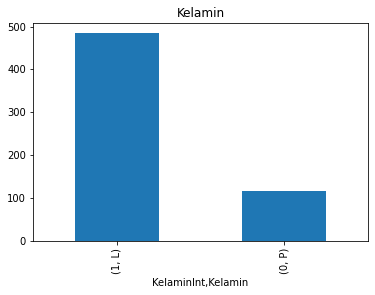

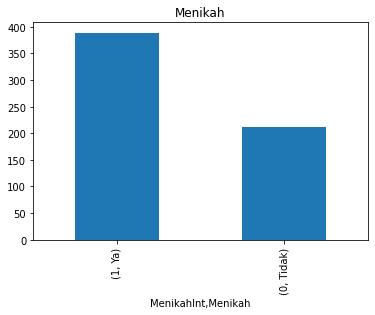

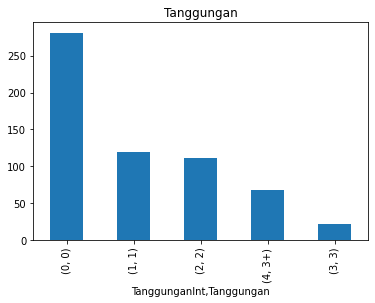

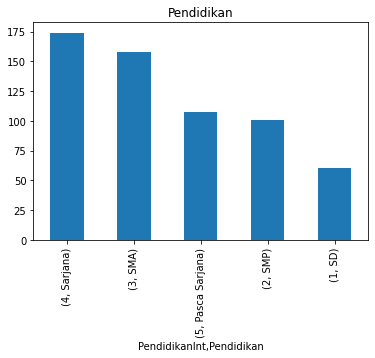

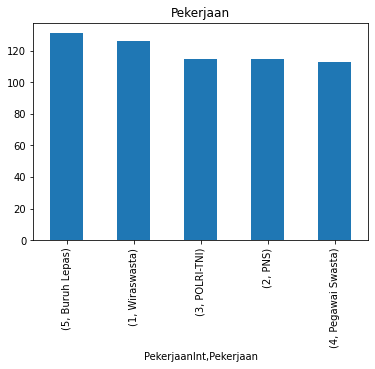

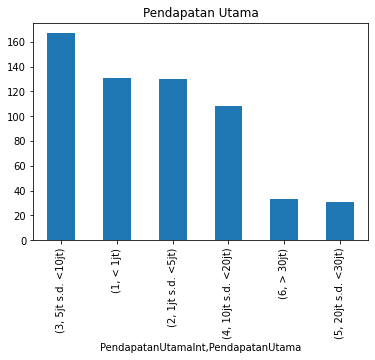

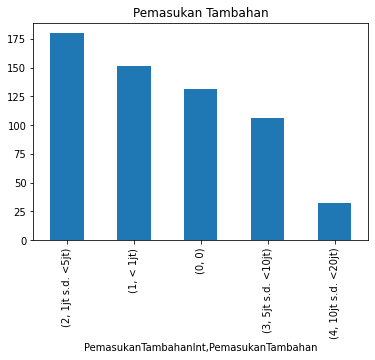

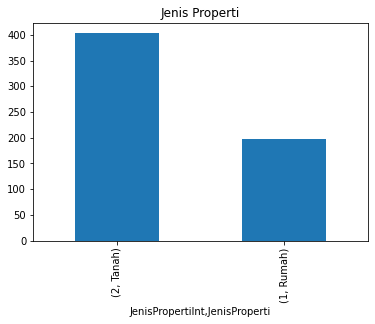

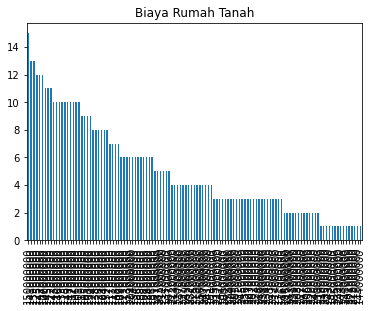

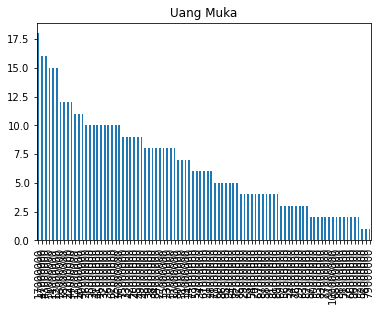

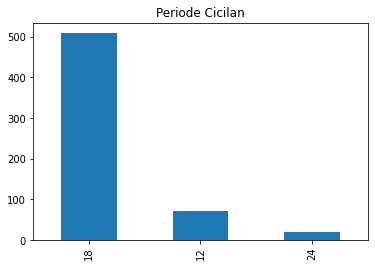

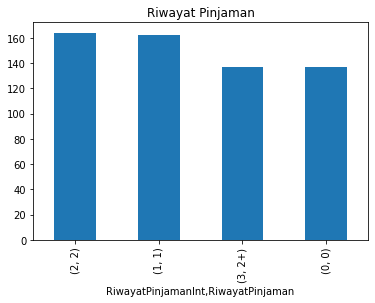

In [87]:
dataframe[['KelaminInt', 'Kelamin']].value_counts().plot.bar(title='Kelamin')
plt.show()
dataframe[['MenikahInt', 'Menikah']].value_counts().plot.bar(title='Menikah')
plt.show()
dataframe[['TanggunganInt', 'Tanggungan']].value_counts().plot.bar(title='Tanggungan')
plt.show()
dataframe[['PendidikanInt', 'Pendidikan']].value_counts().plot.bar(title='Pendidikan')
plt.show()
dataframe[['PekerjaanInt', 'Pekerjaan']].value_counts().plot.bar(title='Pekerjaan')
plt.show()
dataframe[['PendapatanUtamaInt', 'PendapatanUtama']].value_counts().plot.bar(title='Pendapatan Utama')
plt.show()
dataframe[['PemasukanTambahanInt', 'PemasukanTambahan']].value_counts().plot.bar(title='Pemasukan Tambahan')
plt.show()
dataframe[['JenisPropertiInt', 'JenisProperti']].value_counts().plot.bar(title='Jenis Properti')
plt.show()
dataframe['BiayaRumahTanah'].value_counts().plot.bar(title='Biaya Rumah Tanah')
plt.show()
dataframe['UangMuka'].value_counts().plot.bar(title='Uang Muka')
plt.show()
dataframe['PeriodeCicilan'].value_counts().plot.bar(title='Periode Cicilan')
plt.show()
dataframe[['RiwayatPinjamanInt', 'RiwayatPinjaman']].value_counts().plot.bar(title='Riwayat Pinjaman')
plt.show()

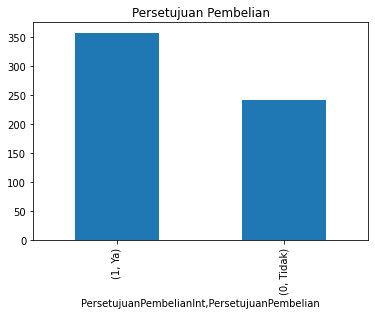

In [88]:
dataframe[['PersetujuanPembelianInt','PersetujuanPembelian']].value_counts().plot.bar(title="Persetujuan Pembelian")

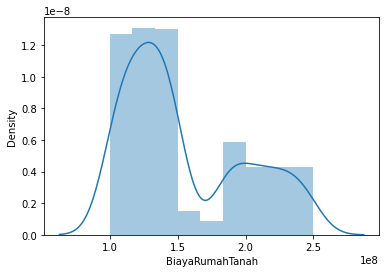

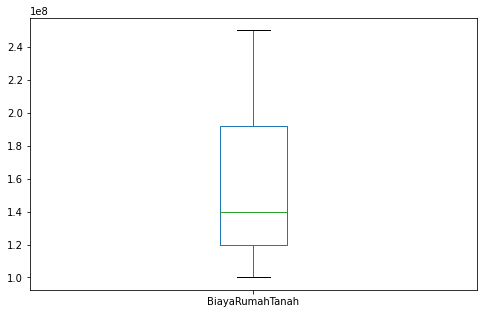

In [89]:
sns.distplot(dataframe['BiayaRumahTanah'])
plt.show()
dataframe['BiayaRumahTanah'].plot.box(figsize=(8,5))
plt.show()

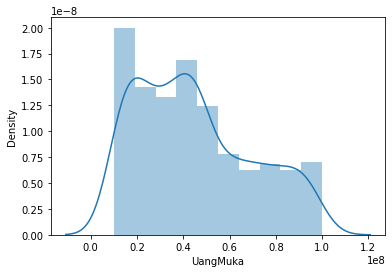

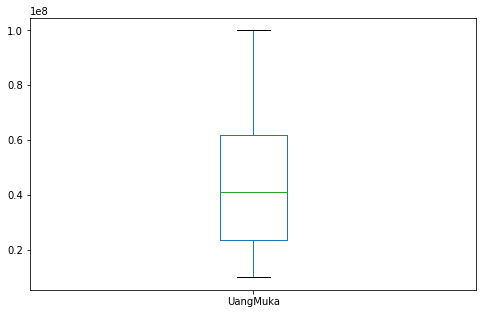

In [90]:
sns.distplot(dataframe['UangMuka'])
plt.show()
dataframe['UangMuka'].plot.box(figsize=(8,5))
plt.show()

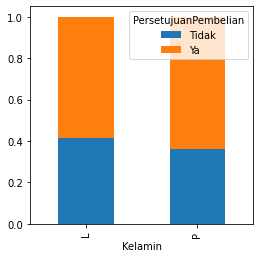

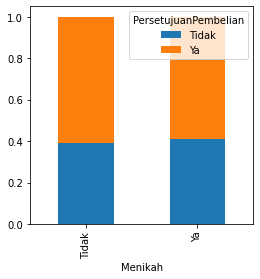

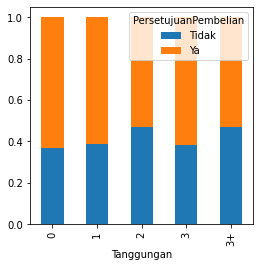

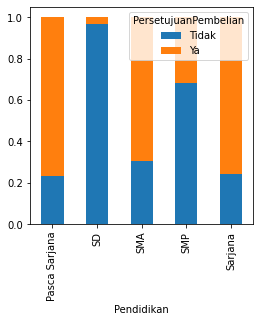

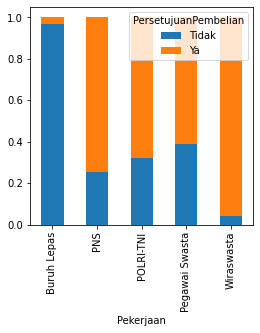

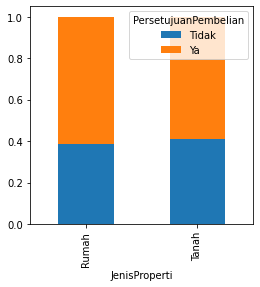

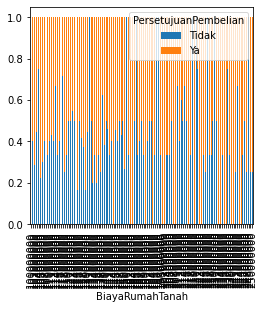

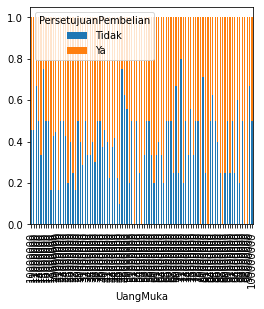

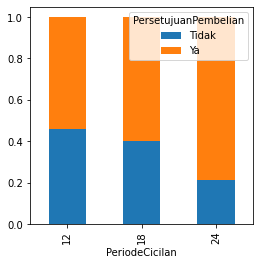

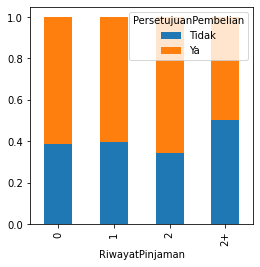

In [91]:
#mengetahui hubungan variabel masukan dengan keluaran
#Jenis Kelamin
Kelamin=pd.crosstab(dataframe['Kelamin'],dataframe['PersetujuanPembelian'])
Kelamin.div(Kelamin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Menikah
Menikah=pd.crosstab(dataframe['Menikah'],dataframe['PersetujuanPembelian'])
Menikah.div(Menikah.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Tanggungan
Tanggungan=pd.crosstab(dataframe['Tanggungan'],dataframe['PersetujuanPembelian'])
Tanggungan.div(Tanggungan.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Pendidikan
Pendidikan=pd.crosstab(dataframe['Pendidikan'],dataframe['PersetujuanPembelian'])
Pendidikan.div(Pendidikan.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Pekerjaan
Pekerjaan=pd.crosstab(dataframe['Pekerjaan'],dataframe['PersetujuanPembelian'])
Pekerjaan.div(Pekerjaan.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Rumah atau Tanah
JenisProperti=pd.crosstab(dataframe['JenisProperti'],dataframe['PersetujuanPembelian'])
JenisProperti.div(JenisProperti.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Biaya Rumah/Tanah
BiayaRumahTanah=pd.crosstab(dataframe['BiayaRumahTanah'],dataframe['PersetujuanPembelian'])
BiayaRumahTanah.div(BiayaRumahTanah.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Uang Muka
UangMuka=pd.crosstab(dataframe['UangMuka'],dataframe['PersetujuanPembelian'])
UangMuka.div(UangMuka.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Periode Cicilan
PeriodeCicilan=pd.crosstab(dataframe['PeriodeCicilan'],dataframe['PersetujuanPembelian'])
PeriodeCicilan.div(PeriodeCicilan.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Riwayat Pinjaman
RiwayatPinjaman=pd.crosstab(dataframe['RiwayatPinjaman'],dataframe['PersetujuanPembelian'])
RiwayatPinjaman.div(RiwayatPinjaman.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


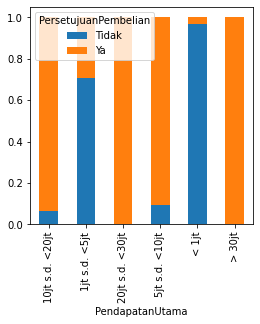

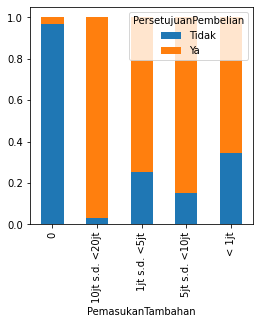

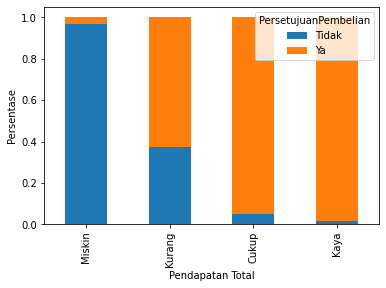

In [92]:
#Pendapatan Utama
PendapatanUtama=pd.crosstab(dataframe['PendapatanUtama'],dataframe['PersetujuanPembelian'])
PendapatanUtama.div(PendapatanUtama.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Pemasukan Tambahan
PemasukanTambahan=pd.crosstab(dataframe['PemasukanTambahan'],dataframe['PersetujuanPembelian'])
PemasukanTambahan.div(PemasukanTambahan.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
#Total Pendapatan = Pendapatan Utama + Pemasukan Tambahan
dataframe['PendapatanTotal']=dataframe['PendapatanUtamaInt']+dataframe['PemasukanTambahanInt']
bins=[0,2.5,5,7.5,10]
group=['Miskin','Kurang','Cukup','Kaya']
dataframe['TotalPendapatan']=pd.cut(dataframe['PendapatanTotal'],bins,labels=group)
Total_Income_bin=pd.crosstab(dataframe['TotalPendapatan'],dataframe['PersetujuanPembelian'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Pendapatan Total')
P=plt.ylabel('Persentase')

In [111]:
X = dataframe[['KelaminInt', 'MenikahInt', 'TanggunganInt', 'PendidikanInt', 'PekerjaanInt', 'PendapatanUtamaInt', 'PemasukanTambahanInt', 'JenisPropertiInt', 'BiayaRumahTanah', 'UangMuka', 'PeriodeCicilan', 'RiwayatPinjamanInt' ]]
Y = dataframe[['PersetujuanPembelianInt']]
Z = datatest[['KelaminInt', 'MenikahInt', 'TanggunganInt', 'PendidikanInt', 'PekerjaanInt', 'PendapatanUtamaInt', 'PemasukanTambahanInt', 'JenisPropertiInt', 'BiayaRumahTanah', 'UangMuka', 'PeriodeCicilan', 'RiwayatPinjamanInt' ]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)



In [113]:
#Model Building:Part 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#copy data
X_train_model1=X_train.copy()
X_test_model1=X_test.copy()
Y_train_model1=Y_train.copy()
Y_test_model1=Y_test.copy()

model = LogisticRegression().fit(X_train_model1, Y_train_model1)
print(model)

akurasi = accuracy_score(Y_test_model1, model.predict(X_test_model1))
print(akurasi)

pred_test = model.predict(Z)
print(pred_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.5
[1 1 1 1 1 1 1 1 1 1]



1 of kfold 5 
accuracy_score 0.5916666666666667

2 of kfold 5 
accuracy_score 0.5916666666666667

3 of kfold 5 
accuracy_score 0.5916666666666667

4 of kfold 5 
accuracy_score 0.5916666666666667

5 of kfold 5 
accuracy_score 0.5916666666666667

 Mean Validation Accuracy 0.5916666666666667

 Prediction Accuracy:  [1 1 1 1 1 1 1 1 1 1]


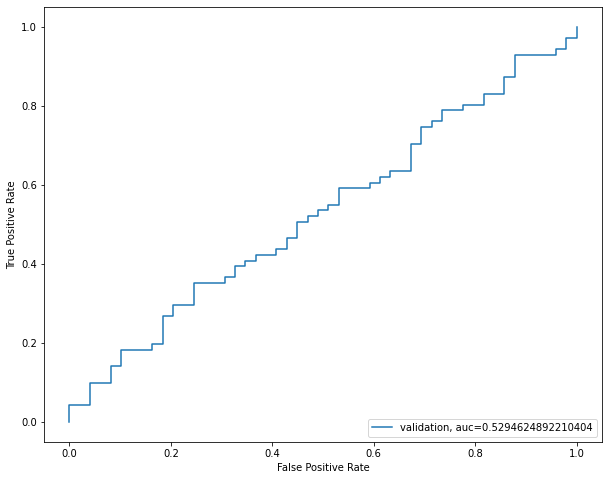

In [128]:
#Model 2
#1. Logistic Regression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
  print ('\n{} of kfold {} '.format(i,kf.n_splits))
  lr_xtr,lr_xvl = X.loc[train_index],X.loc[test_index]
  lr_ytr,lr_yvl = Y.loc[train_index],Y.loc[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(lr_xtr,lr_ytr)
  pred_test=model.predict(lr_xvl)
  score=accuracy_score(yvl,pred_test)
  mean += score
  print ('accuracy_score',score)
  i+=1
  pred_lr = model.predict_proba(lr_xvl)[:,1]
  pred_test_lr = model.predict(Z)
print ('\n Mean Validation Accuracy: ',mean/(i-1))
print ('\n Prediction Accuracy: ', pred_test_lr)

lr_fpr, lr_tpr, _ = metrics.roc_curve(lr_yvl, pred_lr)
auc = metrics.roc_auc_score(lr_yvl, pred_lr)
plt.figure(figsize=(10,8))
plt.plot(lr_fpr, lr_tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


1 of kfold 5 
accuracy_score 0.8

2 of kfold 5 
accuracy_score 0.85

3 of kfold 5 
accuracy_score 0.8583333333333333

4 of kfold 5 
accuracy_score 0.8333333333333334

5 of kfold 5 
accuracy_score 0.8166666666666667

 Mean Validation Accuracy:  0.8316666666666667

 Prediction Accuracy:  [1 0 1 0 0 1 1 1 0 1]


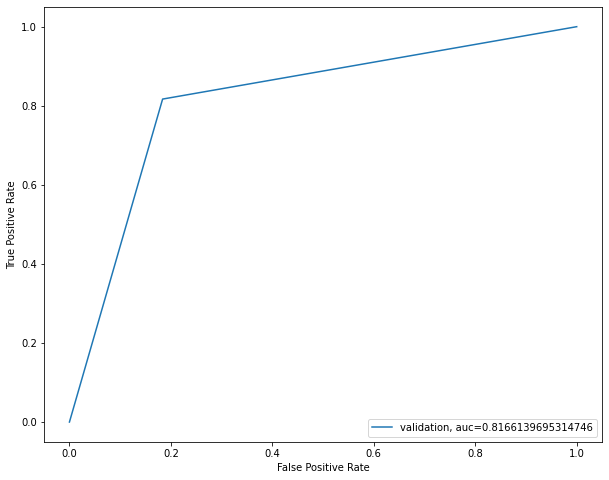

In [127]:
#2. Decision Tree
from sklearn import tree

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
  print ('\n{} of kfold {} '.format(i,kf.n_splits))
  dt_xtr,dt_xvl = X.loc[train_index],X.loc[test_index]
  dt_ytr,dt_yvl = Y.loc[train_index],Y.loc[test_index]
  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(dt_xtr,dt_ytr)
  pred_test = model.predict(dt_xvl)
  score = accuracy_score(dt_yvl,pred_test)
  mean += score
  print ('accuracy_score',score)
  i+=1
  pred_dt = model.predict_proba(dt_xvl)[:,1]
  pred_test_dt = model.predict(Z)
print ('\n Mean Validation Accuracy: ',mean/(i-1))
print ('\n Prediction Accuracy: ', pred_test_dt)

dt_fpr, dt_tpr, _ = metrics.roc_curve(dt_yvl, pred_dt)
auc = metrics.roc_auc_score(dt_yvl, pred_dt)
plt.figure(figsize=(10,8))
plt.plot(dt_fpr, dt_tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


1 of kfold 5 
accuracy_score 0.8416666666666667

2 of kfold 5 
accuracy_score 0.9

3 of kfold 5 
accuracy_score 0.925

4 of kfold 5 
accuracy_score 0.9083333333333333

5 of kfold 5 
accuracy_score 0.8333333333333334

 Mean Validation Accuracy:  0.8816666666666666

 Prediction Accuracy:  [1 0 1 0 0 1 1 1 0 1]


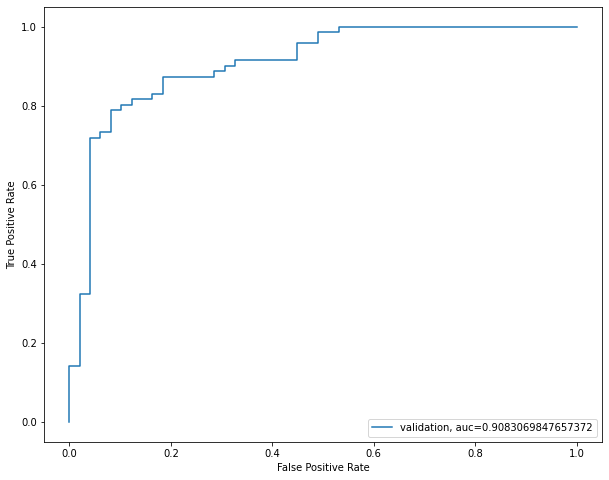

In [130]:
#3. Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
  print ('\n{} of kfold {} '.format(i,kf.n_splits))
  rf_xtr,rf_xvl = X.loc[train_index],X.loc[test_index]
  rf_ytr,rf_yvl = Y.loc[train_index],Y.loc[test_index]
  model = RandomForestClassifier(random_state=1, max_depth=10)
  model.fit(rf_xtr,rf_ytr)
  pred_test = model.predict(rf_xvl)
  score = accuracy_score(rf_yvl,pred_test)
  mean += score
  print ('accuracy_score',score)
  i+=1
  pred_rf = model.predict_proba(rf_xvl)[:,1]
  pred_test_rf = model.predict(Z)
print ('\n Mean Validation Accuracy: ',mean/(i-1))
print ('\n Prediction Accuracy: ', pred_test_rf)

rf_fpr, rf_tpr, _ = metrics.roc_curve(rf_yvl, pred_rf)
auc = metrics.roc_auc_score(rf_yvl, pred_rf)
plt.figure(figsize=(10,8))
plt.plot(rf_fpr, rf_tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#4. XGBoost